# Project Introduction

<b> Kelompok Data Geeks </b>

Nama Kelompok:
1. Christian Lamhot Tua
2. Pedro Putrananda Lende

Project ini merupkan final project 1 yang berisikan penerapan materi regresi linear dengan menggunakan dataset Uber & Lyft (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Dataset tersebut berisi 693071 observasi/baris dan 57 fitur/kolom. Variabel dependen pada project ini adalah price dengan variabel lain menjadi variabel dependen dan beberapa variabel lain seperti Waktu, penggandaan harga (*surge multiplier*), jarak, dan keadaan cuaca pada saat itu akan menjadi variabel dependen. Penggunaan regresi linear adalah untuk mengetahui bagaimana penggandaan harga, jarak, serta keadaan cuaca terhadap variasi harga dari Uber dan Lyft serta mendapatkan model prediksi harga Uber atau Lyft berdasarkan beberapa faktor yang diketahui. 

**Linear Regression**

Regresi Linear merupakan salah satu metode dalam statistika untuk mencari tahu hubungan linear antara variabel independent dengan variabel dependen. Regresi sendiri termasuk kedalam kategori Supervised Learning. Secara umum, persamaan regresi linear dengan $n$ variabel independen adalah sebagai berikut:

$ y = \beta_0 + \beta_ix_i + e ; i=1,2,...,n $

dengan:

$y$ : variabel dependen/respon/target

$\beta_0$ : intersep

$\beta_i$ : koefisien regresi/slope ke-$i$

$x_i$ : variabel independen/*features*/prediktor ke-$i$

$e$ : galat/*error*

*Linear Regression* menghitung estimator dari koefisien regresi atau *predicted weights* dilambangkan dengan $\beta_0, \beta_1, \beta_2,...,\beta_n$. Koefisien regresi ini mendefinisikan estimasi fungsi regresi dan harus menangkap ketergantungan antar variabel dengan baik. Hasil prediksi dari fungsi regresi yang didapat untuk setiap pengamatan harus sedekat mungkin dengan *actual response* sesuai dengan $y_i$. Selisih antara hasil prediksi dengan nilai sebenarnya disebut dengan galat. Regresi adalah tentang menentukan **best predicted weights**, yaitu nilai/bobot yang sesuai dengan galat terkecil. Untuk mendapatkan bobot terbaik, biasanya kita meminimalkan *Sum of Square Residuals* (SSR) untuk semua pengamatan. Pendekatan ini dinamakan *Ordinary Least Square* (OLS).

Untuk mengetahui seberapa baik performa fungsi regresi yang didapat biasanya menggunakan nilai **koefisien determinasi** dilambangkan dengan $R^2$. Nilai ini memberi tahu kita berapa banyak variasi dalam $y$ yang dapat dijelaskan oleh ketergantungan pada $x$. Lebih besar nilai $R^2$ menunjukkan kesesuaian yang lebih baik dan berarti bahwa model/fungsi yang didapat menjelaskan variasi keluaran dengan masukan yang berbeda dengan baik.

**Important Notes:**
- Terdapat beberapa asumsi yang harus dipertimbangkan untuk menyelesaikan permasalahan dalam *LinearRegression*, seperti normalitas data, kesamaan varians antar variabel prediktor, dan lain-lain.
- Apabila *LinearRegression* digunakan untuk tujuan mengetahui signifikansi antar variabel independen terhadap dependennya, diperlukan pengujian hipotesis dengan nilai statistik $t$ dan ANOVA.
- Terdapat beberapa jenis persamaan regresi, seperti *Simple Linear Regression*, *Multiple Linear Regression*, dan *Polynomial Regression*.

Sumber:
https://www.kode.id/courses/take/introduction-to-python-for-data-science-km/texts/25596516-regression-models
https://www.kaggle.com/satyajitmaitra/linear-regression#Practical-Guide-To-Linear-Regression

# Import pustaka yang dibutuhkan

In [1]:
# Library Mengolah Data
import pandas as pd
import numpy as np

# Library Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supaya pesan warning tidak muncul,maka diignore
import warnings
warnings.filterwarnings('ignore')

<b> Untuk menampilkan semua kolom yang ada pada dataset:

In [2]:
pd.set_option("display.max.columns", None) 

# Data loading

## Read Dataset

<b> Untuk read file dataset:</b>

In [3]:
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

<b>Untuk melihat 5 data teratas dari dataset:</b>

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


<b>Untuk melihat 5 data terakhir dari dataset:</b>

In [5]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


<b> Untuk mengetahui dimensi dari dataset seperti informasi tentang jumlah baris dan kolom:</b>

In [6]:
print(df.shape)

(693071, 57)


<b>Untuk mendapatkan informasi tentang seluruh nama kolom,jumlah data yang kosong ditiap kolom serta tipe data pada masing-masing kolom dataset:</b>

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari hasil ringkasan data diatas, dapat kita ketahui bahwa dataset ini terdiri atas 693071 baris dan 57 kolom. Dari 57 kolom terdiri atas 29 kolom dengan tipe data *float*, dan 17 kolom dengan tipe data *integer*, serta 11 kolom dengan tipe data *object* atau kategorikal 

# Eksplorasi data

Pada tahap ini akan dilakukan eksplorasi terhadap data guna mencari tahu informasi dalam data dengan menggunakan visualisasi data. Hal ini juga bertujuan untuk mencari tahu variabel apa saja yang berpengaruh secara signifikan terhadap variabel harga taksi Uber & Lyft

## Korelasi antara harga, penggandaan harga, dan jarak

In [8]:
#Memisahkan dataframe menjadi dua , datarframe Uber dan dataset Lyft
df_vis = df.copy()
df_vis = df_vis[["distance", "price", "surge_multiplier", "cab_type"]]
df_uber = df_vis[df_vis['cab_type'] =="Uber"]
df_lyft = df_vis[df_vis['cab_type'] =="Lyft"]

### Korelasi antara Harga, penggandaan harga, dan jarak dengan Uber

                  distance     price  surge_multiplier
distance          1.000000  0.336204               NaN
price             0.336204  1.000000               NaN
surge_multiplier       NaN       NaN               NaN


<AxesSubplot:>

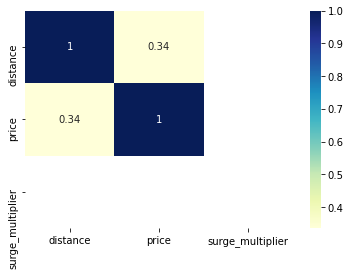

In [9]:
# Menghitung koefisien korelasi pada dataframe Uber
print(df_uber.corr())

# Plotting correlation heatmap
sns.heatmap(df_uber.corr(), cmap="YlGnBu", annot=True)

Diketahui pada kolom `surge_multiplier` taxi Uber hanya terdapat satu nilai NaN sehingga Uber tidak memberlakukan penggandaan harga. Berdasarkan plot heatmap di atas, dapat disimpulkan bahwa korelasi antara `distance` dan `price` berkorelasi positif namun sangat lemah karena berada pada angka 0.34. Dimana semakin jauh jarak yang ditempuh maka akan harga pun juga akan naik.

                  distance     price  surge_multiplier
distance          1.000000  0.361567          0.040076
price             0.361567  1.000000          0.308237
surge_multiplier  0.040076  0.308237          1.000000


<AxesSubplot:>

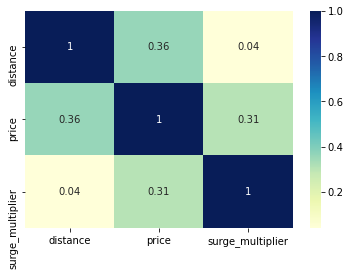

In [10]:
# Menghitung koefisien korelasi pada dataframe Lyft
print(df_lyft.corr())

# Plotting correlation heatmap
sns.heatmap(df_lyft.corr(), cmap="YlGnBu", annot=True)

Diketahui taxi Lyft memberlakukan penggandaan harga. Berdasarkan plot heatmap di atas, dapat disimpulkan bahwa `price` dan `surge_multiplier` memiliki korelasi positif namun sangat lemah karena berada pada angka 0.31, yang berarti semakin naik penggandaan harga maka akan diikuti dengan kenaikkan harga juga.

## Scatterplot `price` vs `distance`

Text(0, 0.5, 'Price')

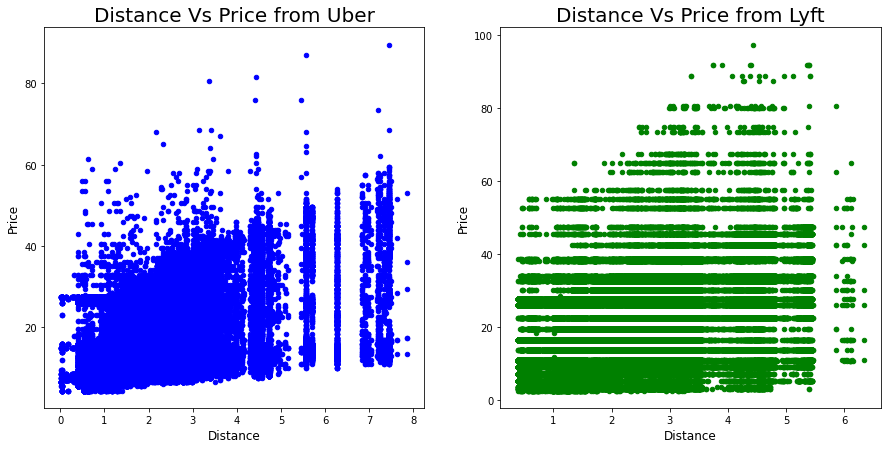

In [11]:
#Membuat subplot untuk scatterplot pada dataframe Uber & Lyft
fig = plt.figure(figsize=(15,7))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#Scatterplot untuk dataframe Uber
df_uber.plot(kind="scatter", x="distance", y="price", ax=ax0, color="blue")
ax0.set_title("Distance Vs Price from Uber", fontsize=20)
ax0.set_xlabel("Distance", fontsize=12)
ax0.set_ylabel("Price", fontsize=12)

#Scatterplot untuk dataframe Lyft
df_lyft.plot(kind="scatter", x="distance", y="price", ax=ax1, color="green")
ax1.set_title("Distance Vs Price from Lyft", fontsize=20)
ax1.set_xlabel("Distance", fontsize=12)
ax1.set_ylabel("Price", fontsize=12)

Diagram scatterplot diatas menunjukkan perbandingan antara jarak (distance) dengan harga (price). Pada plot tersebut dapat kita lihat bahwa penambahan jarak tidak menimbulkan pengaruh yang besar terhadap harga, hal ini ditunjukkan dengan koefisien korelasi yang lemah sehingga hubungan linear antara kedua variabel tersebut juga lemah. Terdapat perbedaan pola antara Uber dan Lyft dimana persebaran titik persebaran pada Lyft lebih konstan dibanding Uber, hal ini diakibatkan oleh adanya penggandaan harga yang diberlakukan oleh taxi Lyft.

## Rata-rata harga berdasarkan jarak yang ditempuh pada masing-masing tipe taksi

In [12]:
#Dataframe Uber & Lyft dengan jarak 
df_ride_share = df[['distance', 'cab_type', 'timestamp', 'destination', 'source', 'price',
                    'surge_multiplier', 'name']]
#Table distance & price berdasarkan tipe taksi (missing values tidak ada)
df_ride = df_ride_share[["cab_type","distance","price"]] 
df_ride.dropna(axis=0, inplace=True)
df_ride.head()

,cab_type,distance,price
0,Lyft,0.44,5.0
1,Lyft,0.44,11.0
2,Lyft,0.44,7.0
3,Lyft,0.44,26.0
4,Lyft,0.44,9.0


In [13]:
#Pivot table distance & price berdasarkan tipe taksi dengan mean (missing values diabaikan)
df_price = pd.pivot_table(df_ride, columns="cab_type", index="distance", values="price", aggfunc=np.mean)
df_price.head()

cab_type,Lyft,Uber
distance,,
0.02,NaN,11.850000
0.03,NaN,11.666667
0.04,NaN,12.000000
0.12,NaN,12.000000
0.17,NaN,11.583333


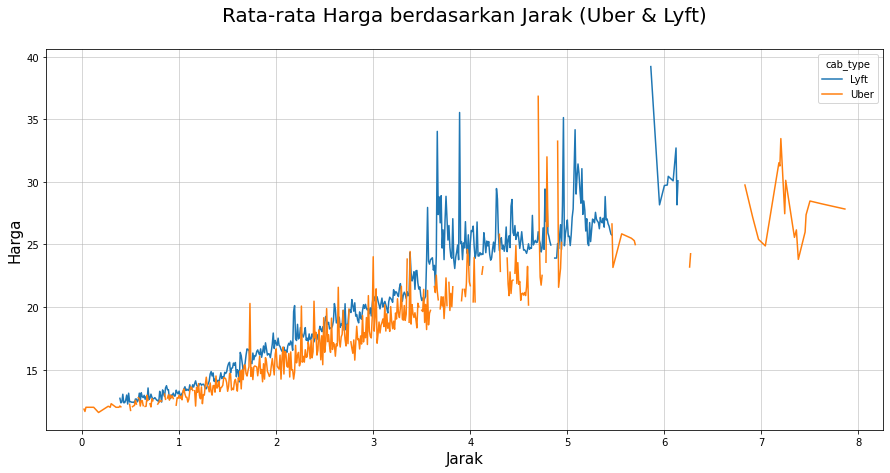

In [14]:
#Plotting rata-rata harga berdasarkan jarak masing-masing taksi
df_price.plot(kind="line", figsize=(15,7))
plt.title("Rata-rata Harga berdasarkan Jarak (Uber & Lyft)\n", fontsize=20)
plt.xlabel("Jarak", fontsize=15)
plt.ylabel("Harga", fontsize=15)
plt.grid(linewidth=0.5)
plt.show()

Berdasarkan diagram garis diatas, dapat kita simpulkan bahwa uber memberikan harga yang lebih rendah dibanding Lyft, sehingga Uber lebih ekonomis dibanding Lyft. Akan tetapi Lyft juga menawarkan harga yang tidak terlalu mahal karena selisihnya sedikit dengan harga Uber.

## Menghitung jumlah masing-masing kategori penggandaan harga taksi

In [15]:
#Memisahkan dataframe Uber dan Lyft
df_uber = df_ride_share[df_ride_share['cab_type'] =="Uber"]
df_lyft = df_ride_share[df_ride_share['cab_type'] =="Lyft"]

In [16]:
#Menghitung jumlah masing-masing kategori penggandaan harga
print("Penggandaan harga pada taksi Uber:\n", df_uber["surge_multiplier"].value_counts())
print("Penggandaan harga pada taksi Lyft:\n", df_lyft["surge_multiplier"].value_counts())

Penggandaan harga pada taksi Uber:
 1.0    385663
Name: surge_multiplier, dtype: int64
Penggandaan harga pada taksi Lyft:
 1.00    286433
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64


Diketahui bahwa paling banyak penggandaan harga yang diberlakukan taksi Lyft adalah 1.00

## Hubungan antara tipe taksi Uber dan Lyft dengan harga

In [17]:
df_ride_share

,distance,cab_type,timestamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1.544953e+09,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1.543284e+09,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1.543367e+09,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1.543554e+09,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1.543463e+09,North Station,Haymarket Square,9.0,1.0,Lyft XL
...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1.543708e+09,North End,West End,13.0,1.0,UberXL
693067,1.00,Uber,1.543708e+09,North End,West End,9.5,1.0,UberX
693068,1.00,Uber,1.543708e+09,North End,West End,NaN,1.0,Taxi
693069,1.00,Uber,1.543708e+09,North End,West End,27.0,1.0,Black SUV


In [18]:
#Memisahkan dataset Uber dan Lyft
df_uber_types = df_ride_share[df_ride_share['cab_type'] =="Uber"]
df_lyft_types = df_ride_share[df_ride_share['cab_type'] =="Lyft"]

In [19]:
df_lyft_types = df_lyft_types[["name","distance","price"]]
df_uber_types = df_uber_types[["name","distance","price"]]

In [20]:
#Membuat tabel pivot yang berisi rata-rata harga berdasarkan jarak sesuai dengan tipe taksi
pivot_lyft = pd.pivot_table(df_lyft_types, columns="name", index="distance")
pivot_uber = pd.pivot_table(df_uber_types, columns="name", index="distance")

Text(0, 0.5, 'Price')

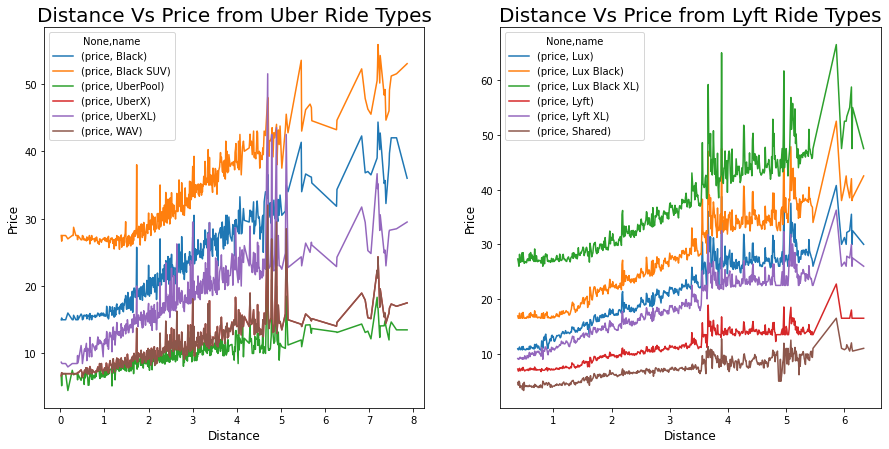

In [21]:
#Membuat subplot untuk line plot pada dataframe Uber & Lyft
fig = plt.figure(figsize=(15,7))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#Line plot untuk dataframe Uber
pivot_uber.plot(kind="line", ax=ax0)
ax0.set_title("Distance Vs Price from Uber Ride Types", fontsize=20)
ax0.set_xlabel("Distance", fontsize=12)
ax0.set_ylabel("Price", fontsize=12)

#Line plot untuk dataframe Lyft
pivot_lyft.plot(kind="line", ax=ax1)
ax1.set_title("Distance Vs Price from Lyft Ride Types", fontsize=20)
ax1.set_xlabel("Distance", fontsize=12)
ax1.set_ylabel("Price", fontsize=12)

Pada plot diatas, dapat kita ketahui bahwa tipe taksiBlack SUV pada Uber dan tipe taksi Lux Black XL pada Lyft merupakan tipe taksi dengani kategori harga yang paling mahal. Dan untuk tipe taxi dengan kategori paling murah yaitu tipe taksi UberPool pada Uber dan tipe taksi Shared pada Lyft.

## Hubungan cuaca dengan jumlah pelanggan dan variasi harga taksi

In [22]:
#Dataframe dengan kolom cuaca
'''Kolom karakteristik cuaca yang disertakan dalam dataset:
-temperature
-short_summary: yang berisi ringkasan singkat keterangan cuaca pada saat itu
-windGust: kecepatan angin
-precipIntensityMax: ketinggian maksimal curah hujan 
'''

df_weather = df[["cab_type","temperature","short_summary","windGust","precipIntensityMax","price"]]
df_weather.head()

,cab_type,temperature,short_summary,windGust,precipIntensityMax,price
0,Lyft,42.34,Mostly Cloudy,9.17,0.1276,5.0
1,Lyft,43.58,Rain,11.98,0.1300,11.0
2,Lyft,38.33,Clear,7.33,0.1064,7.0
3,Lyft,34.38,Clear,5.28,0.0000,26.0
4,Lyft,37.44,Partly Cloudy,9.14,0.0001,9.0


In [23]:
#Temperature
df_temp = df_weather["temperature"]
df_temp

0         42.34
1         43.58
2         38.33
3         34.38
4         37.44
          ...  
693066    37.05
693067    37.05
693068    37.05
693069    37.05
693070    37.05
Name: temperature, Length: 693071, dtype: float64

In [24]:
#Dataframe temperature dengan rata-rata harga
df_temp_price = df_weather[["temperature","price"]]
df_temp_price = df_temp_price.groupby("temperature").mean()
df_temp_price

,price
temperature,
18.91,16.668028
18.97,16.584302
19.28,16.469346
20.01,16.565230
20.07,16.549014
...,...
53.51,16.383633
54.38,16.519062
54.59,16.389884


In [25]:
#Dataframe precipIntensityMax/ketinggian maksimal curah hujan dengan rata-rata harga
df_precip = df_weather[["precipIntensityMax", "price"]]
df_precip = df_precip.groupby("precipIntensityMax").mean()
df_precip

,price
precipIntensityMax,
0.0000,16.561727
0.0001,16.542801
0.0003,16.470152
0.0004,16.450532
0.0005,16.507372
...,...
0.1429,16.498392
0.1430,16.520948
0.1433,16.634755


In [26]:
#Jumlah rides berdasarkan short_summary
df_sum = df_weather[["cab_type","short_summary"]]
df_sum = df_sum.groupby("short_summary").count()
df_sum

,cab_type
short_summary,
Clear,87126
Drizzle,7296
Foggy,9060
Light Rain,54912
Mostly Cloudy,146210
Overcast,218895
Partly Cloudy,127224
Possible Drizzle,18636
Rain,23712


Text(0.5, 1.0, 'Proporsi Jumlah Rides berdasarkan Short Summary')

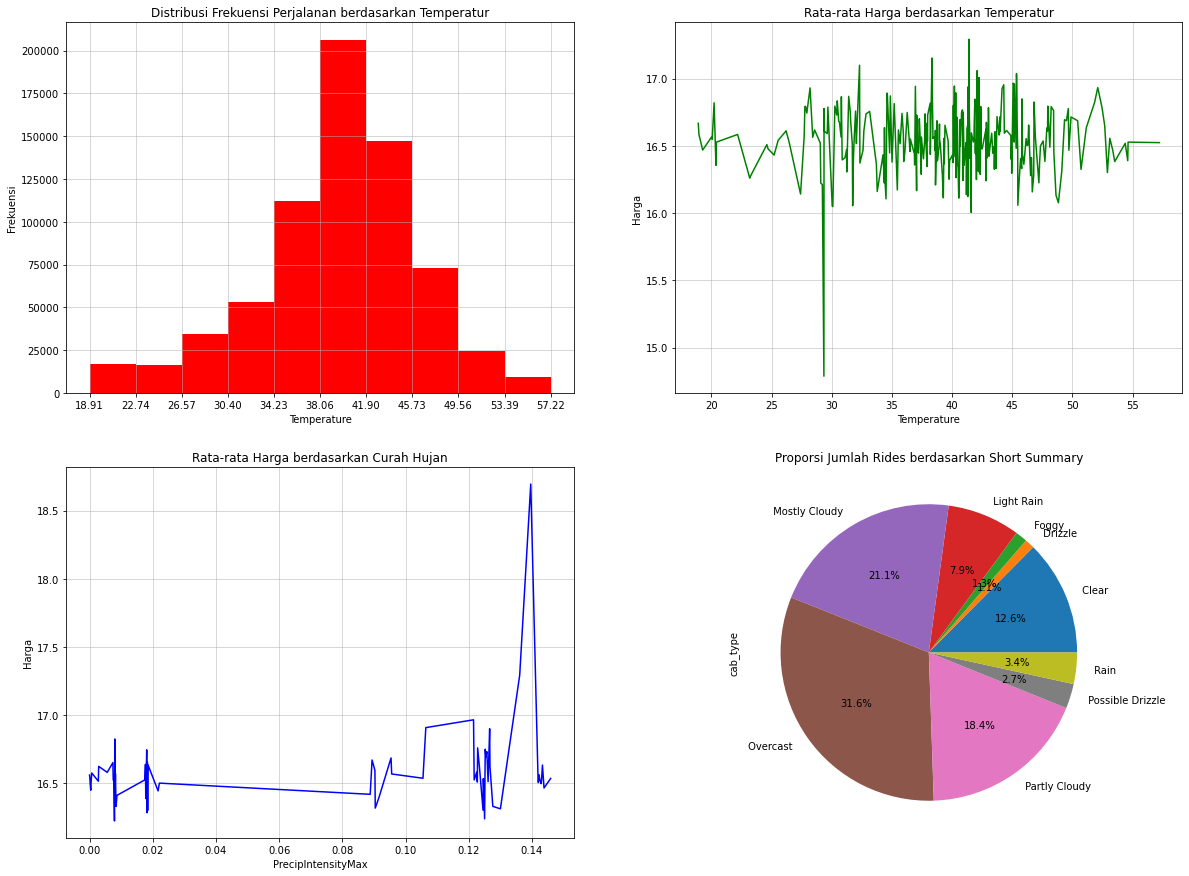

In [27]:
#Membuat subplot
fig = plt.figure(figsize=(20,15))

ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

#Memecah dataset menjadi 15 bin()
count, bin_edges = np.histogram(df_temp, 10)

#Distribusi frekuensi perjalanan dengan Uber dan Lyft berdasarkan temperaturenya
df_temp.plot(kind="hist", bins=10, xticks=bin_edges, color="red", ax=ax0)
ax0.set_title("Distribusi Frekuensi Perjalanan berdasarkan Temperatur")
ax0.set_xlabel("Temperature")
ax0.set_ylabel("Frekuensi")
ax0.grid(linewidth=0.5)

#Rata-rata harga berdasarkan temperature
df_temp_price.plot(kind="line", color="green", ax=ax1, legend=False)
ax1.set_title("Rata-rata Harga berdasarkan Temperatur")
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Harga")
ax1.grid(linewidth=0.5)

#Rata-rata harga berdasarkan ketinggian maksimal Curah Hujan (precipIntensityMax)
df_precip.plot(kind="line", color="blue", ax=ax2, legend=False)
ax2.set_title("Rata-rata Harga berdasarkan Curah Hujan")
ax2.set_xlabel("PrecipIntensityMax")
ax2.set_ylabel("Harga")
ax2.grid(linewidth=0.5)

#Proporsi jumlah rides berdasarkan short_summary
df_sum.plot(kind="pie", autopct='%1.1f%%', subplots=True, ax=ax3, legend=False)
ax3.set_title("Proporsi Jumlah Rides berdasarkan Short Summary")

Berdasarkan plot di atas, diketahui bahwa jumlah *rides* tinggi pada temperatur sekitar 38.06 sampai 41.90 derajat. Selain itu, temperature dan curah hujan tidak menghasilkan suatu hubungan linear atau dalam kata lain korelasi sangat rendah. Selanjutnya, pada saat `short_summary` *overcast* proporsi jumlah *rides* tinggi. Artinya, pengguna banyak menggunakan layanan taksi pada saat cuaca mendung.


---

Berdasarkan analisis eksplorasi data di atas, dapat disimpulkan bahwa:
1. Penggandaan harga (`surge_multiplier`) dan jarak (`distance`) memiliki hubungan linear positif terhadap harga (`price`). Berarti kenaikan penggandaan harga dan jarak akan diikuti dengan kenaikan harga juga.
2. Tipe taksi Uber dan Lyft memiliki pengaruh terhadap variasi harga. Tipe taksi Black SUV pada Uber dan tipe taksi Lux Black XL pada Lyft menawarkan layanan dengan harga tertinggi. Sedangkan tipe taksi UberPool pada Uber dan tipe taksi Shared pada Lyft menawarkan layanan dengan harga terendah.
3. Pengguna banyak menggunakan layanan taksi pada saat mendung (*overcast*).
4. Uber tidak memberlakukan penggandaan harga, sedangkan Lyft memberlakukan penggandaan harga, sehingga dapat dikatakan bahwa Uber lebih ekonomis dibandingkan Lyft.

## Korelasi semua kolom karakteristik cuaca dengan kolom `price`

In [28]:
#drop kolom yang tidak perlu, dropping kolom berdasarkan informasi statistik yang sesuai dengan kolom yang dibutuhkan 
corr_data = df.copy()
corr_data.drop(["id","timestamp","timezone","source","destination",
        "long_summary","icon", "datetime","visibility.1",
        "latitude","longitude","icon","windGustTime",
        "temperatureHighTime","temperatureLowTime",
        "apparentTemperatureHighTime","apparentTemperatureLowTime",
        "sunriseTime","sunsetTime","uvIndexTime",
        "temperatureMinTime","temperatureMaxTime",
        "apparentTemperatureMinTime","apparentTemperatureMaxTime"], axis=1, inplace=True)

In [29]:
#mengubah kolom price menjadi float64
corr_data["price"]= pd.to_numeric(corr_data["price"])

<AxesSubplot:>

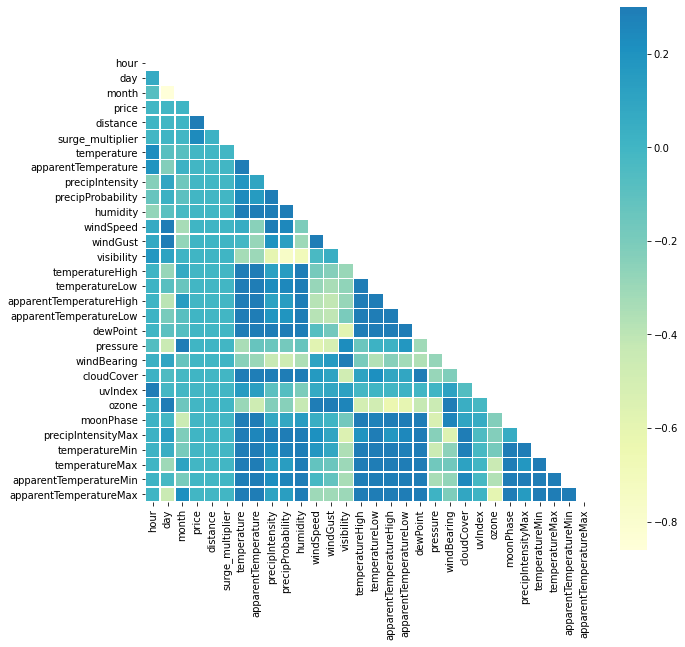

In [30]:
corrMatrix = corr_data.corr()

# Set up figur plot
f, ax = plt.subplots(figsize=(10, 20))

#Masking heatmap berbentuk segitiga
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

# Heatmap correlation plot
sns.heatmap(corrMatrix, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5})

Berdasarkan *heatmap plot* di atas, diketahui bahwa kolom `price` hanya memiliki korelasi dengan kolom `distance` dan `surge_multiplier`, dan juga berdasarkan eksplorasi data di atas bahwa karakteristik cuaca tidak menunjukkan adanya pola hubungan dengan kolom `price`. Sehingga, variabel independen yang digunakan untuk model regresi adalah: kolom `cab_type`,`name`,`distance`, dan `surge_multiplier`.

# Data preprocessing

In [31]:
#Fix columns
fix_col = ["cab_type","name","distance","surge_multiplier","price"]
df1 = df[fix_col]

In [32]:
df1

,cab_type,name,distance,surge_multiplier,price
0,Lyft,Shared,0.44,1.0,5.0
1,Lyft,Lux,0.44,1.0,11.0
2,Lyft,Lyft,0.44,1.0,7.0
3,Lyft,Lux Black XL,0.44,1.0,26.0
4,Lyft,Lyft XL,0.44,1.0,9.0
...,...,...,...,...,...
693066,Uber,UberXL,1.00,1.0,13.0
693067,Uber,UberX,1.00,1.0,9.5
693068,Uber,Taxi,1.00,1.0,NaN
693069,Uber,Black SUV,1.00,1.0,27.0


In [33]:
data = df1.copy()

## Nilai statistik masing-masing tipe kolom numerik

In [34]:
data.describe()

,distance,surge_multiplier,price
count,693071.000000,693071.000000,637976.000000
mean,2.189430,1.013870,16.545125
std,1.138937,0.091641,9.324359
min,0.020000,1.000000,2.500000
25%,1.280000,1.000000,9.000000
50%,2.160000,1.000000,13.500000
75%,2.920000,1.000000,22.500000
max,7.860000,3.000000,97.500000


In [35]:
#Memisahkan data distance,surge multiplier dan price
distance = data["distance"]
surge_multiplier = data["surge_multiplier"]
price = data["price"]

<AxesSubplot:>

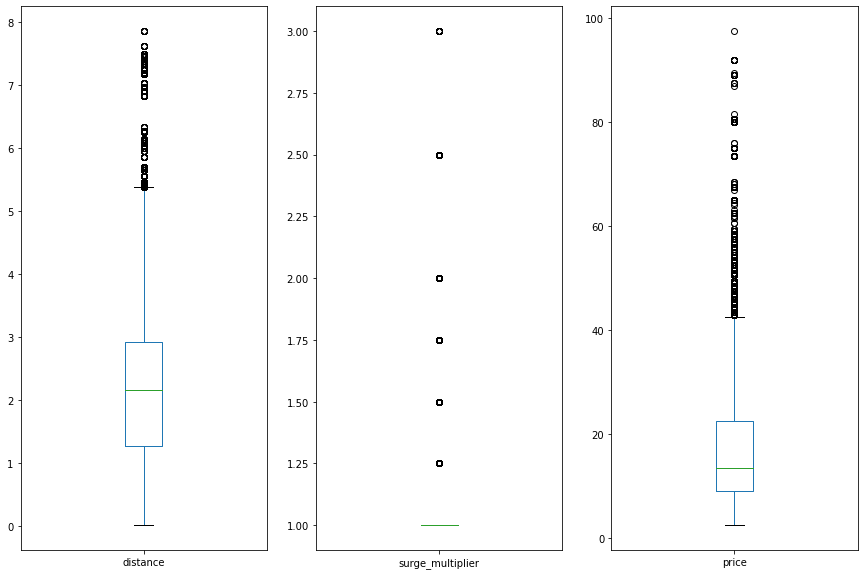

In [36]:
#Visualisasi dengan boxplot
#Membuat subplot
fig = plt.figure(figsize=(15,10))

ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)

distance.plot(kind="box", ax=ax0)
surge_multiplier.plot(kind="box", ax=ax1)
price.plot(kind="box", ax=ax2)

## *Encoder* menggunakan OneHotEncoder

In [37]:
#from sklearn.preprocessing import OneHotEncoder
cat_col = data.select_dtypes(include=['object','category']).columns.tolist()

#encoder kolom dengan nilai kategorik
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(data[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    data = data.drop(col, axis=1)
    data = pd.concat([data, enc_df], axis=1)

In [38]:
data

,distance,surge_multiplier,price,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.44,1.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,1.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,1.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
693067,1.00,1.0,9.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693068,1.00,1.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
693069,1.00,1.0,27.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#Mengurutkan kolom data
cols = ["distance",
        "surge_multiplier",
        "cab_type_Uber",
        "cab_type_Lyft",
        "name_UberX",
        "name_UberXL",
        "name_Black",
        "name_Black SUV",
        "name_WAV",
        "name_UberPool",
        "name_Taxi",
        "name_Shared",
        "name_Lyft",
        "name_Lyft XL",
        "name_Lux",
        "name_Lux Black",
        "name_Lux Black XL",
       "price"]
data = data[cols]

In [40]:
data

,distance,surge_multiplier,cab_type_Uber,cab_type_Lyft,name_UberX,name_UberXL,name_Black,name_Black SUV,name_WAV,name_UberPool,name_Taxi,name_Shared,name_Lyft,name_Lyft XL,name_Lux,name_Lux Black,name_Lux Black XL,price
0,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
2,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
3,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0
4,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
693067,1.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5
693068,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
693069,1.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


<b> Untuk mengetahui dimensi dari dataset seperti informasi tentang jumlah baris dan kolom:</b>

In [41]:
data.shape

(693071, 18)

<b> Untuk mengetahui daftar nama kolom yang ada didataset:</b>

In [42]:
data.columns

Index(['distance', 'surge_multiplier', 'cab_type_Uber', 'cab_type_Lyft',
       'name_UberX', 'name_UberXL', 'name_Black', 'name_Black SUV', 'name_WAV',
       'name_UberPool', 'name_Taxi', 'name_Shared', 'name_Lyft',
       'name_Lyft XL', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'price'],
      dtype='object')

## Menghilangkan *missing values*

In [43]:
data.isnull().sum()

distance                 0
surge_multiplier         0
cab_type_Uber            0
cab_type_Lyft            0
name_UberX               0
name_UberXL              0
name_Black               0
name_Black SUV           0
name_WAV                 0
name_UberPool            0
name_Taxi                0
name_Shared              0
name_Lyft                0
name_Lyft XL             0
name_Lux                 0
name_Lux Black           0
name_Lux Black XL        0
price                55095
dtype: int64

Terdapat 55095 *missing values* pada kolom `price`.

In [44]:
data.dropna(inplace=True)

In [45]:
data.isnull().sum()

distance             0
surge_multiplier     0
cab_type_Uber        0
cab_type_Lyft        0
name_UberX           0
name_UberXL          0
name_Black           0
name_Black SUV       0
name_WAV             0
name_UberPool        0
name_Taxi            0
name_Shared          0
name_Lyft            0
name_Lyft XL         0
name_Lux             0
name_Lux Black       0
name_Lux Black XL    0
price                0
dtype: int64

# Mendefinisikan model

Membagi data *training* dan *testing* dengan rasio 80:20.

In [46]:
X = data.drop("price", axis=1)
y = data["price"]

In [47]:
X.head()

,distance,surge_multiplier,cab_type_Uber,cab_type_Lyft,name_UberX,name_UberXL,name_Black,name_Black SUV,name_WAV,name_UberPool,name_Taxi,name_Shared,name_Lyft,name_Lyft XL,name_Lux,name_Lux Black,name_Lux Black XL
0,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
reg = LinearRegression()

# Melatih model

In [50]:
model = reg.fit(X_train.values,y_train.values)
y_pred = reg.predict(X_test.values)

In [51]:
print("Nilai koefisien regresi:\n", model.coef_)
print("Nilai intersep:\n", model.intercept_)

Nilai koefisien regresi:
 [ 2.79871021e+00  1.82434965e+01  1.11834890e+11 -4.03374810e+11
 -3.47198051e+12 -3.47198051e+12 -3.47198051e+12 -3.47198051e+12
 -3.47198051e+12 -3.47198051e+12  2.44928667e+11 -2.95677081e+12
 -2.95677081e+12 -2.95677081e+12 -2.95677081e+12 -2.95677081e+12
 -2.95677081e+12]
Nilai intersep:
 3360145620644.6836


# Evaluasi performa model

Nilai $R^2$ model regresi pada data *testing*

In [52]:
r2_score(y_test, y_pred)

0.9282081296207364

---

Mengecek nilai $R^2$ pada data *training*

In [53]:
y_train_pred = reg.predict(X_train)
r2_score(y_train, y_train_pred)

0.9270377469342107

---

Diketahui nilai $R^2$ pada model regresi yang diuji yang didapat adalah 0.9282 atau dalam persentase 92.82%. Artinya, variabel-variabel didalam dataset dapat menjelaskan variasi `price` atau harga sebesar 92.82%. Terdapat 7.18% faktor lain yang tidak dimasukkan ke dalam dataset.

Selain dari nilai $R^2$, dapat juga dilihat dari nilai RMSE (*Root Mean Square Error*) dan MAE (*Mean Absolute Error*).

In [54]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

2.484729750548808


In [55]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.7664346684004104

Diketahui nilai RMSE yang didapat adalah 2.485 dan nilai MAE yang didapat adalah 1.7661. Selanjutnya akan dilihat bagaimana plot perbandingan antara nilai asli dengan nilai prediksinya:

In [56]:
#Membuat array dari nilai y_test
y_test_vis = np.array(y_test)
y_test_vis

array([19.5, 10.5,  5. , ...,  8. , 16.5,  7. ])

In [57]:
y_pred

array([21.04589844, 11.56591797,  8.19921875, ...,  9.05859375,
       19.11376953,  5.39941406])

In [58]:
#Membuat dataframe nilai y_test dan y_pred
resid = pd.DataFrame(y_pred, y_test_vis) 
resid = resid.reset_index() 
resid = resid.rename(columns={"index":"actual_val",
                             0:"predict_val"})

In [59]:
#Menambahkan kolom dari selisih antara nilai y_test dan y_pred
resid["residual"] = resid["actual_val"] - resid["predict_val"]
resid

,actual_val,predict_val,residual
0,19.5,21.045898,-1.545898
1,10.5,11.565918,-1.065918
2,5.0,8.199219,-3.199219
3,16.5,16.849609,-0.349609
4,38.5,33.446289,5.053711
...,...,...,...
127591,9.5,11.633301,-2.133301
127592,19.5,20.458008,-0.958008
127593,8.0,9.058594,-1.058594
127594,16.5,19.113770,-2.613770


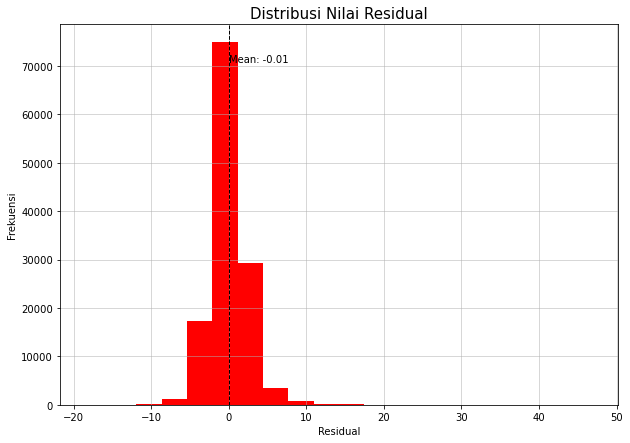

In [60]:
#Plotting
dist_resid = resid["residual"]
dist_resid.plot(kind="hist", figsize=(10,7), bins=20, color="r")
plt.title("Distribusi Nilai Residual", fontsize=15)
plt.xlabel("Residual", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(linewidth=0.5)
plt.axvline(dist_resid.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(dist_resid.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(dist_resid.mean()))
plt.show()

Berdasarkan plot di atas, diketahui bahwa nilai residual menyebar di sekitar 0 dengan mean = -0.01. Ini berarti residual berdistribusi normal dan memenuhi salah satu asumsi klasik regresi linear. Dapat dikatakan bahwa model regresi yang didapat baik dalam memprediksi nilai variabel dependennya.

# Model Inference

Model inference digunakan untuk menguji kekuratan model dan menguji model dengan data diluar data yang tersedia

Contoh:Jika seseorang ingin melihat harga prediksi taksi uber/lyft yang harus dia keluarkan.Jika diketahui jarak yang ingin ditempuh adalah 2.6 km dan pada hari itu,ia ingin menggunakan taksi Uber dengan tipe taksi UberX sehingga tidak berlaku adanya penggandaan harga 

In [61]:
distance = float(input("Distance:"))
surge = float(input("Surge Multiplier:"))
types = input("Uber/Lyft?")
ride = input("Ride Types:")

val = [distance, surge]

cab_types = {"Uber":0,
            "Lyft":1}

for i in range(0,2):
    if cab_types[types]==i:
        val.append(1.0)
    else:
        val.append(0.0)
        
ride_types = {"UberX" : 0,
              "UberXL" : 1,
              "Black" : 2,
              "BlackSUV": 3,
              "WAV" : 4,
              "UberPool" : 5,
              "Taxi" : 6,
              "Shared" : 7,
              "Lyft" : 8,
              "LyftXL" : 9,
              "Lux": 10,
              "LuxBlack" : 11,
              "LuxBlackXL" : 12}

for i in range(0,13):
    if ride_types[ride]==i:
        val.append(1.0)
    else:
        val.append(0.0)

print(val)

predict = reg.predict([val])

print("Here's your estimated price:", abs(predict))

Distance:2.6
Surge Multiplier:0
Uber/Lyft?Uber
Ride Types:UberX
[2.6, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Here's your estimated price: [7.33056641]


Contoh:Jika seseorang ingin melihat harga prediksi taksi uber/lyft yang harus dia keluarkan.Jika diketahui jarak yang ingin ditempuh adalah 2.4 km dan pada hari itu,ia ingin menggunakan taksi Lyft dengan tipe taksi LyftXL sehingga berlaku adanya penggandaan harga sebesar 0.25 dollar

In [62]:
distance = float(input("Distance:"))
surge = float(input("Surge Multiplier:"))
types = input("Uber/Lyft?")
ride = input("Ride Types:")

val = [distance, surge]

cab_types = {"Uber":0,
            "Lyft":1}

for i in range(0,2):
    if cab_types[types]==i:
        val.append(1.0)
    else:
        val.append(0.0)
        
ride_types = {"UberX" : 0,
              "UberXL" : 1,
              "Black" : 2,
              "BlackSUV": 3,
              "WAV" : 4,
              "UberPool" : 5,
              "Taxi" : 6,
              "Shared" : 7,
              "Lyft" : 8,
              "LyftXL" : 9,
              "Lux": 10,
              "LuxBlack" : 11,
              "LuxBlackXL" : 12}

for i in range(0,13):
    if ride_types[ride]==i:
        val.append(1.0)
    else:
        val.append(0.0)

print(val)

predict = reg.predict([val])

print("Here's your estimated price:", abs(predict))

Distance:2.4
Surge Multiplier:0.25
Uber/Lyft?Lyft
Ride Types:LyftXL
[2.4, 0.25, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
Here's your estimated price: [1.52392578]


# Conclusions

Kesimpulan dari final project 1,dapat kita lihat dari hasil analisis dan visualisasi diatas yaitu:
1. Pada Final Project 1 ini,kelompok kami menerapkan Linear Regression pada dataset Uber & Lyft untuk mengetahui bagaimana penggandaan harga, jarak, dan keadaan cuaca terhadap variasi harga serta mendapatkan model prediksi harga armada Uber/Lyft berdasarkan faktor-faktor yang diketahui.
2. Dataset uber & Lyft sebelum diolah terdiri dari 693071 baris dan 57 kolom dan setelah data uber & Lyft diolah berubah menjadi 693071 baris dan 18 kolom yang berisi tentang data harga perjalanan menggunakan taksi Uber & Lyft berdasarkan penggandaan harga (surge multiplier), jarak(distance), tipe taksi(cab_type), jenis layanan taksi(name) dan harga(price) pada saat itu
3. Variasi harga dipengaruhi oleh Tipe taksi Uber dan Lyft.Tipe taksi Black SUV pada Uber dan tipe taksi Lux Black XL pada Lyft merupakan harga layanan tertinggi
4. Pengguna layanan aplikasi taksi uber/lyft banyak digunakan pada saat overcast/mendung
5. Menggunakan layanan uber lebih ekonomis dibandingkan Lyft karena uber tidak memberlakukan penggandaan harga sedangkan Lyft memberlakukan penggandaan harga  
6. Variabel dependen/responnya pada dataset uber & Lyft adalah price
7. Berdasarkan hasil riset data, variabel independen yang digunakan untuk memprediksi variabel dependennya adalah:
    - distance: jarak
   
    - surge_multiplier : penggandaan harga
        
    - cab_type: tipe taksi
    
    - name: jenis layanan taksi
    
    
8. Model regresi yang diuji memiliki nilai 0.9282 atau dalam persentase 92.82%.Yang berarti,variabel-variabel independennya cukup baik dalam menjelaskan variasi dependennya(price)
9. Nilai RMSE (Root Mean Square Error) dan MAE (Mean Absolute Error) dari model sebesar 2.48 dan 1.776.
10. residual berdistribusi normal dan memenuhi salah satu asumsi klasik regresi linear serta dapat dikatakan bahwa model regresi yang didapat baik dalam memprediksi nilai variabel dependennya

# Save model

In [63]:
pickle_file_dir = open('reg_model.studi','wb')

pickle.dump(reg, pickle_file_dir)
pickle_file_dir.close()

In [64]:
pickle_file_read = open("reg_model.studi", "rb")
read_classifier = pickle.load(pickle_file_read)

In [65]:
read_classifier.predict(X_test)

array([21.04589844, 11.56591797,  8.19921875, ...,  9.05859375,
       19.11376953,  5.39941406])